<h3 style="
    font-size: 36px;
    font-weight: bold;
    color: #0077cc;
    text-align: center;
    margin-top: 30px;
    margin-bottom: 20px;
">
    Surface Air Temperature
</h3>


In [27]:
import pandas as pd

# =====================================================
#  Load the dataset
# =====================================================
temp_df = pd.read_csv(
    "datasetCA2/SurfaceAirTemperatureMonthlyMeanDailyMaximum.csv"
)

print("=== Surface Air Temperature Monthly Mean Daily Maximum Dataset ===\n")

# =====================================================
#  Dataset size (rows & columns)
# =====================================================
print(f"This dataset has {temp_df.shape[0]} rows and {temp_df.shape[1]} columns\n")

# =====================================================
#  Column data (name, datatype, null values)
# =====================================================
print("Column Data:")
for col in temp_df.columns:
    print(
        f"- Name: {col} | "
        f"Data Type: {temp_df[col].dtype} | "
        f"Amount Of Null Values: {temp_df[col].isnull().sum()}"
    )
print()

# =====================================================
#  Dataset structure: grouped by month (12 months per year)
# =====================================================
# Convert month column to datetime 
temp_df['month'] = pd.to_datetime(temp_df['month'])

# Extract year using pandas datetime accessor
temp_df['year'] = temp_df['month'].dt.year

print("Number of monthly records per year (first 5 years):")
print(temp_df.groupby('year').size().head(5), "\n")

print(
    "Explanation:\n"
    "The dataset is organised by month within each year. "
    "For example, each year contains 12 records, representing "
    "the 12 months from January to December.\n"
)

# =====================================================
#  Dataset sample
# =====================================================
print("Dataset Sample (first 5 rows):")
print(temp_df.head(5))


=== Surface Air Temperature Monthly Mean Daily Maximum Dataset ===

This dataset has 528 rows and 2 columns

Column Data:
- Name: month | Data Type: object | Amount Of Null Values: 0
- Name: temp_mean_daily_max | Data Type: float64 | Amount Of Null Values: 0

Number of monthly records per year (first 5 years):
year
1982    12
1983    12
1984    12
1985    12
1986    12
dtype: int64 

Explanation:
The dataset is organised by month within each year. For example, each year contains 12 records, representing the 12 months from January to December.

Dataset Sample (first 5 rows):
       month  temp_mean_daily_max  year
0 1982-01-01                 29.8  1982
1 1982-02-01                 32.3  1982
2 1982-03-01                 31.7  1982
3 1982-04-01                 31.4  1982
4 1982-05-01                 31.7  1982


<p>
This dataset contains monthly mean daily maximum surface air temperature values,
organised by year and month with consistent 12-month coverage per year and no missing values.
</p>

<p>
Based on the surface air temperature data, it is possible to explore whether rising temperatures
may be associated with increased carbon dioxide emissions, particularly from vehicles.
In the following dataset, fossil fuel sources are analysed to identify which contribute most
significantly to increases in air temperature.
</p>


<h3 style="
    font-size: 36px;
    font-weight: bold;
    color: #0077cc;
    text-align: center;
    margin-top: 30px;
    margin-bottom: 20px;
">
    Annual Motor Vehicle Population by Type of Fuel Used
</h3>


In [28]:
import pandas as pd

# =====================================================
# Load the dataset
# =====================================================
vehicle_fuel_df = pd.read_csv(
    "datasetCA2/AnnualMotorVehiclePopulationbyTypeofFuelUsed.csv"
)

print("=== Annual Motor Vehicle Population by Type of Fuel Used ===\n")

# =====================================================
#  Dataset size
# =====================================================
print(f"This dataset has {vehicle_fuel_df.shape[0]} rows and {vehicle_fuel_df.shape[1]} columns\n")

# =====================================================
# 3️⃣ Column data: datatype, null values, zero values
# =====================================================
print("Column Data (Null & Zero Values):")

for col in vehicle_fuel_df.columns:
    null_count = vehicle_fuel_df[col].isnull().sum()

    if pd.api.types.is_numeric_dtype(vehicle_fuel_df[col]):
        zero_count = (vehicle_fuel_df[col] == 0).sum()
    else:
        zero_count = "N/A"

    print(
        f"- Name: {col} | "
        f"Data Type: {vehicle_fuel_df[col].dtype} | "
        f"Null Values: {null_count} | "
        f"Zero Values: {zero_count}"
    )

print()

# =====================================================
# 4️⃣ Dataset sample
# =====================================================
print("Dataset Sample (first 5 rows):")
print(vehicle_fuel_df.head(), "\n")

# =====================================================
# 5️⃣ Group by engine type (mean number)
# =====================================================
engine_mean = vehicle_fuel_df.groupby('engine')['number'].mean()

print("Mean vehicle population by engine type:")
print(engine_mean)


=== Annual Motor Vehicle Population by Type of Fuel Used ===

This dataset has 390 rows and 4 columns

Column Data (Null & Zero Values):
- Name: year | Data Type: int64 | Null Values: 0 | Zero Values: 0
- Name: type | Data Type: object | Null Values: 0 | Zero Values: N/A
- Name: engine | Data Type: object | Null Values: 0 | Zero Values: N/A
- Name: number | Data Type: int64 | Null Values: 0 | Zero Values: 104

Dataset Sample (first 5 rows):
   year  type                     engine  number
0  2006  Cars                     Petrol  471707
1  2006  Cars                     Diesel       7
2  2006  Cars            Petrol-Electric     379
3  2006  Cars  Petrol-Electric (Plug-In)       0
4  2006  Cars                 Petrol-CNG     214 

Mean vehicle population by engine type:
engine
CNG                               5.019231
Diesel                        44337.865385
Diesel-Electric                   4.974359
Electric                         17.661538
Petrol                       144792.1538

<p>
This dataset records the annual population of motor vehicles by engine type.
It contains 390 records across multiple years and categorises vehicles by fuel technology,
including petrol, diesel, electric, and hybrid engines.
The dataset contains no missing values, making it suitable for comparative analysis of
vehicle fuel usage trends.
</p>


<p>
Different engine types rely on different fuel sources, which have varying impacts on
carbon dioxide emissions.
Petrol and diesel engines burn fossil fuels directly and are major contributors to CO₂ emissions,
while hybrid engines partially reduce fuel consumption by combining electric power with fossil fuels.
Fully electric vehicles do not produce tailpipe CO₂ emissions but still depend indirectly on
electricity generation sources.
The dominance of petrol and diesel vehicles observed in this dataset suggests that fossil fuel
combustion from road transport may be a significant factor influencing surface air temperature trends
examined in the previous dataset.
</p>


<h3 style="
    font-size: 36px;
    font-weight: bold;
    color: #0077cc;
    text-align: center;
    margin-top: 30px;
    margin-bottom: 20px;
">
    Carbon Dioxide Emissions From Combustion Of FossilFuel
</h3>


In [30]:
import pandas as pd

# =====================================================
# Load dataset
# =====================================================
co2_df = pd.read_csv(
    "datasetCA2/CarbonDioxideEmissionsFromCombustionOfFossilFuels.csv"
)

print("=== Carbon Dioxide Emissions from Fossil Fuel Combustion ===\n")

# =====================================================
#  Dataset size
# =====================================================
print(f"This dataset has {co2_df.shape[0]} rows and {co2_df.shape[1]} columns\n")

# =====================================================
# 3 Column data (datatype & null values)
# =====================================================
print("Column Data:")
for col in co2_df.columns:
    print(
        f"- Name: {col} | "
        f"Data Type: {co2_df[col].dtype} | "
        f"Null Values: {co2_df[col].isnull().sum()}"
    )
print()

# =====================================================
#  Dataset sample
# =====================================================
print("Dataset Sample (first 5 rows):")
print(co2_df.head(), "\n")

# =====================================================
#  Cumulative CO₂ emissions over time
# =====================================================
print("Cumulative CO₂ emissions:")
print(co2_df['co2_emissions'].cumsum().head())

# =====================================================
#  Mean CO₂ emissions
# =====================================================
print("Average annual CO₂ emissions:")
print(co2_df['co2_emissions'].mean(), "\n")

# =====================================================
#  Year of minimum & maximum emissions
# =====================================================
print("Year with minimum CO₂ emissions:")
print(co2_df.loc[co2_df['co2_emissions'].idxmin()], "\n")

print("Year with maximum CO₂ emissions:")
print(co2_df.loc[co2_df['co2_emissions'].idxmax()], "\n")


=== Carbon Dioxide Emissions from Fossil Fuel Combustion ===

This dataset has 7 rows and 2 columns

Column Data:
- Name: year | Data Type: int64 | Null Values: 0
- Name: co2_emissions | Data Type: int64 | Null Values: 0

Dataset Sample (first 5 rows):
   year  co2_emissions
0  2007          39905
1  2008          38524
2  2009          39465
3  2010          43122
4  2011          45281 

Cumulative CO₂ emissions:
0     39905
1     78429
2    117894
3    161016
4    206297
Name: co2_emissions, dtype: int64
Average annual CO₂ emissions:
41576.857142857145 

Year with minimum CO₂ emissions:
year              2008
co2_emissions    38524
Name: 1, dtype: int64 

Year with maximum CO₂ emissions:
year              2011
co2_emissions    45281
Name: 4, dtype: int64 



<p>
This dataset records annual carbon dioxide (CO₂) emissions resulting from the combustion of fossil fuels.
It contains yearly emission values with no missing data, making it suitable for trend and comparative analysis.
</p>

<p>
The descriptive statistics indicate that annual CO₂ emissions vary across the observed period, with identifiable
years of minimum and maximum emissions. The cumulative emissions further highlight the long-term accumulation
of CO₂ in the atmosphere.
</p>

<p>
Carbon dioxide emissions are largely produced through the burning of fossil fuels such as petrol and diesel,
which are commonly used by car engines. As observed in the motor vehicle dataset, the dominance of fossil
fuel-powered vehicles may contribute to higher CO₂ emissions, which in turn are associated with increases
in surface air temperature examined in the temperature dataset.
</p>

<h3 style="
    font-size: 36px;
    font-weight: bold;
    color: #0077cc;
    text-align: center;
    margin-top: 30px;
    margin-bottom: 20px;
">
    Motor Vehicle Population By Type Of Vehicle End Of Period Annual
</h3>


In [31]:
import pandas as pd

# =====================================================
# Load dataset
# =====================================================
vehicle_df = pd.read_csv(
    "datasetCA2/MotorVehiclePopulationByTypeOfVehicleEndOfPeriodAnnual.csv",
    na_values=["na", "NA", "NaN"]
)

# Strip whitespace from DataSeries (VERY IMPORTANT for your dataset)
vehicle_df['DataSeries'] = vehicle_df['DataSeries'].str.strip()

# =====================================================
#  Basic Information (Slide Methods)
# =====================================================
print("=== Basic Information ===\n")

print(f"Dataset Shape: {vehicle_df.shape}")        # df.shape

print("\nData Types:")
print(vehicle_df.dtypes)                           # df.dtypes

print("\nNon-NA Count per Column:")
print(vehicle_df.count())                          # df.count()

# =====================================================
#  Show only first 5 rows
# =====================================================
print("\n=== Dataset Sample (First 5 years) ===\n")

cols_to_show = vehicle_df.columns[:6]   # DataSeries + first 5 year columns
print(vehicle_df[cols_to_show].head())

# =====================================================
#  Total Missing Values
# =====================================================
total_na = vehicle_df.isna().sum().sum()

print("\n=== Missing Values Summary ===")
print(f"Total NA values in dataset: {total_na}")

# =====================================================
#  Subset specific columns using df.loc
# =====================================================
latest_years = vehicle_df.columns[-5:]

print("\n=== Subset using df.loc (Latest 5 Years) ===")

subset_df = vehicle_df.loc[:, ['DataSeries'] + list(latest_years)]

# Convert ONLY numeric year columns
subset_df[latest_years] = subset_df[latest_years].apply(
    pd.to_numeric, errors='coerce'
)

print(subset_df)

# =====================================================
#  Summary statistics using df.describe
# =====================================================
print("\n=== Summary Statistics (Latest 5 Years) ===")
print(subset_df[latest_years].describe())

# =====================================================
#  Sort values using df.sort_values
# =====================================================
latest_year = latest_years[-1]

print(f"\n=== Sorted by {latest_year} (Descending) ===")

sorted_df = subset_df.sort_values(by=latest_year, ascending=False)
print(sorted_df)


=== Basic Information ===

Dataset Shape: (7, 65)

Data Types:
DataSeries     object
2024            int64
2023            int64
2022            int64
2021            int64
               ...   
1965          float64
1964          float64
1963          float64
1962          float64
1961          float64
Length: 65, dtype: object

Non-NA Count per Column:
DataSeries    7
2024          7
2023          7
2022          7
2021          7
             ..
1965          4
1964          4
1963          4
1962          4
1961          4
Length: 65, dtype: int64

=== Dataset Sample (First 5 years) ===

               DataSeries     2024    2023    2022    2021    2020
0                   Total  1007094  996732  995746  988755  973990
1  Private & Company Cars   569956  572014  580332  579369  565033
2       Private Hire Cars    90383   81754   72632   67990   71147
3                   Taxis    13117   13620   14084   14887   15678
4                   Buses    18698   18249   18239   18846   19251

<h2>1. Description of Dataset</h2>

<p>
This dataset presents Singapore’s annual motor vehicle population from 1961 to 2024,
covering seven vehicle categories including Total vehicles, Private & Company Cars,
Private Hire Cars, Taxis, Buses, Motorcycles & Scooters, and Goods & Other Vehicles.
Each column represents a specific year, while each row represents a vehicle category.
</p>

<p>
The dataset contains 65 years of data, allowing for long-term trend analysis of
vehicle growth patterns and structural changes in Singapore’s transport landscape.
Recent years contain complete records, while earlier years have some missing values,
indicating historical evolution in vehicle categories.
</p>


<h2>2. Insight</h2>

<p>
The data shows a substantial increase in total vehicle population over time,
reaching over 1,000,000 vehicles in 2024. Private & Company Cars consistently form
the largest proportion of vehicles, indicating heavy reliance on fossil-fuel-powered
private transport.
</p>

<p>
An increase in the number of vehicles directly implies higher fossil fuel consumption,
as most conventional vehicles rely on petrol or diesel. Greater fossil fuel combustion
produces more carbon dioxide (CO₂), a major greenhouse gas. Increased CO₂ concentration
enhances the greenhouse effect, trapping more heat in the atmosphere and contributing
to rising surface air temperatures.
</p>

<p>
Therefore, the growth in vehicle population may be a contributing factor to increased
CO₂ emissions and long-term temperature rise.
</p>


<h3 style="
    font-size: 36px;
    font-weight: bold;
    color: #0077cc;
    text-align: center;
    margin-top: 30px;
    margin-bottom: 20px;
">
    Climate Change and Energy Green Vehicles
</h3>


In [ ]:
import pandas as pd

green_df = pd.read_csv("datasetCA2/ClimateChangeandEnergyGreenVehicles.csv")

print("=== Green Vehicles Dataset Overview ===\n")


print("Column Data:")

for col in green_df.columns:
    print(
        f"- Name: {col} | "
        f"Data Type: {green_df[col].dtype} | "
        f"Null Values: {green_df[col].isnull().sum()}"
    )

print()

#  Column Names
print("\nColumn Names:")
print(green_df.columns)

# 3️⃣ First 5 Rows
print("\nFirst 5 Rows:")
print(green_df.head())

# 4️⃣ Last 5 Rows
print("\nLast 5 Rows:")
print(green_df.tail())
print("\n")
start_value = green_df.iloc[0]['no_of_green_vehicles']
end_value = green_df.iloc[-1]['no_of_green_vehicles']

percentage_growth = ((end_value - start_value) / start_value) * 100

print(f"Percentage Growth from {green_df.iloc[0]['year']} to {green_df.iloc[-1]['year']}: {percentage_growth:.2f}%")


# 5️⃣ Year with Lowest Number of Green Vehicles
print("\nLowest Green Vehicle Year:")
print(green_df.nsmallest(1, 'no_of_green_vehicles'))

# 6️⃣ Year with Highest Number of Green Vehicles
print("\nHighest Green Vehicle Year:")
print(green_df.nlargest(1, 'no_of_green_vehicles'))


=== Green Vehicles Dataset Overview ===

Column Data:
- Name: year | Data Type: int64 | Null Values: 0
- Name: no_of_green_vehicles | Data Type: int64 | Null Values: 0


Column Names:
Index(['year', 'no_of_green_vehicles'], dtype='object')

First 5 Rows:
   year  no_of_green_vehicles
0  2003                    35
1  2004                    79
2  2005                   198
3  2006                   716
4  2007                  1543

Last 5 Rows:
    year  no_of_green_vehicles
7   2010                  8711
8   2011                  9376
9   2012                  9880
10  2013                 10277
11  2014                 11635


Percentage Growth from 2003 to 2014: 33142.86%

Lowest Green Vehicle Year:
   year  no_of_green_vehicles
0  2003                    35

Highest Green Vehicle Year:
    year  no_of_green_vehicles
11  2014                 11635


<h2>Dataset Description</h2>
<p>
This dataset contains annual data on the number of green vehicles in Singapore 
from 2003 to 2014. Each row represents a specific year, while the column 
<code>no_of_green_vehicles</code> shows the total number of registered 
environmentally friendly vehicles for that year. The dataset contains 12 rows 
and 2 columns, with no missing values, making it reliable for trend analysis.
</p>

<h2>Insight</h2>
<p>
The data shows a significant increase in green vehicle adoption, rising from 
35 vehicles in 2003 to 11,635 vehicles in 2014. This rapid growth suggests a 
strong shift towards environmentally friendly transportation. As the number of 
green vehicles increases, reliance on fossil fuels may decrease, potentially 
leading to lower CO₂ emissions and reduced surface air temperature over time.
</p>


<h3 style="
    font-size: 36px;
    font-weight: bold;
    color: #0077cc;
    text-align: center;
    margin-top: 30px;
    margin-bottom: 20px;
">
    Annual Fuel Mix for Electricity Generation by Energy Products
</h3>


In [ ]:
import pandas as pd

# =====================================================
# Load Dataset
# =====================================================
fuel_df = pd.read_csv(
    "datasetCA2/AnnualFuelMixforElectricityGenerationbyEnergyProducts2005toJun2021.csv",
    na_values=["na", "NA", "NaN"]
)

# =====================================================
#  Column Information (AS REQUESTED – at the start)
# =====================================================
print("=== Column Data ===")
for col in fuel_df.columns:
    print(
        f"- Name: {col} | "
        f"Data Type: {fuel_df[col].dtype} | "
        f"Null Values: {fuel_df[col].isnull().sum()}"
    )

print()

# =====================================================
#   METHOD 1: df.pivot()  (Reshaping Data)
# =====================================================
pivot_df = fuel_df.pivot(
    index='year',
    columns='energy_products',
    values='percentage'
)

print("=== Pivot Table (Fuel Mix by Year) ===")
print(pivot_df.head())

# =====================================================
#   METHOD 2: df.describe()  (Summary Statistics)
# =====================================================
print("\n=== Summary Statistics ===")
print(pivot_df.describe())

# =====================================================
#   METHOD 3: df.idxmax()  (Find Peak Fossil Fuel Year)
# =====================================================
highest_gas_year = pivot_df['Natural Gas'].idxmax()

print("\n=== Year with Highest Natural Gas Usage ===")
print(highest_gas_year)

# =====================================================
#   METHOD 3: Percentage Change (Trend Analysis)
# =====================================================
pct_change_df = pivot_df.pct_change() * 100

print("\n=== Yearly Percentage Change (%) ===")
print(pct_change_df.head())

# Example: Total growth from first year to last year (Natural Gas)
start = pivot_df['Natural Gas'].iloc[0]
end = pivot_df['Natural Gas'].iloc[-1]

total_growth = ((end - start) / start) * 100

print(f"\nTotal Percentage Change in Natural Gas Share: {total_growth:.2f}%")


=== Column Data ===
- Name: year | Data Type: int64 | Null Values: 0
- Name: energy_products | Data Type: object | Null Values: 0
- Name: percentage | Data Type: float64 | Null Values: 0

=== Pivot Table (Fuel Mix by Year) ===
energy_products  Coal  Natural Gas  Others  Petroleum Products
year                                                          
2005              0.0         74.4     2.5                23.1
2006              0.0         77.8     2.4                19.8
2007              0.0         78.7     2.4                18.9
2008              0.0         80.3     2.5                17.2
2009              0.0         80.6     2.5                16.9

=== Summary Statistics ===
energy_products       Coal  Natural Gas     Others  Petroleum Products
count            17.000000    17.000000  17.000000           17.000000
mean              0.558824    87.411765   2.752941            9.294118
std               0.614470     8.523928   0.287484            9.267987
min               0.

<h2>Dataset Description</h2>
<p>
This dataset contains annual data on Singapore’s electricity generation fuel mix 
from 2005 to 2021. Each row represents a specific year and energy product category 
(Coal, Natural Gas, Petroleum Products, and Others), while the 
<code>percentage</code> column shows the share of electricity generated from 
each energy source. The dataset is complete with no missing values, making it 
reliable for analysing long-term energy dependency trends.
</p>

<h2>Insight</h2>
<p>
The analysis shows that Natural Gas consistently accounts for the largest 
percentage of electricity generation, peaking in 2020 and increasing overall 
by 27.69% across the dataset period. Although Petroleum Products declined, 
Singapore remains heavily dependent on fossil fuels. Burning fossil fuels 
releases CO₂ into the atmosphere, which contributes to greenhouse gas buildup 
and rising surface air temperatures.
</p>


<h3 style="
    font-size: 36px;
    font-weight: bold;
    color: #1a57db;
    text-align: center;
    margin-top: 30px;
    margin-bottom: 20px;
">
    C02 vs Air Temperature
</h3>

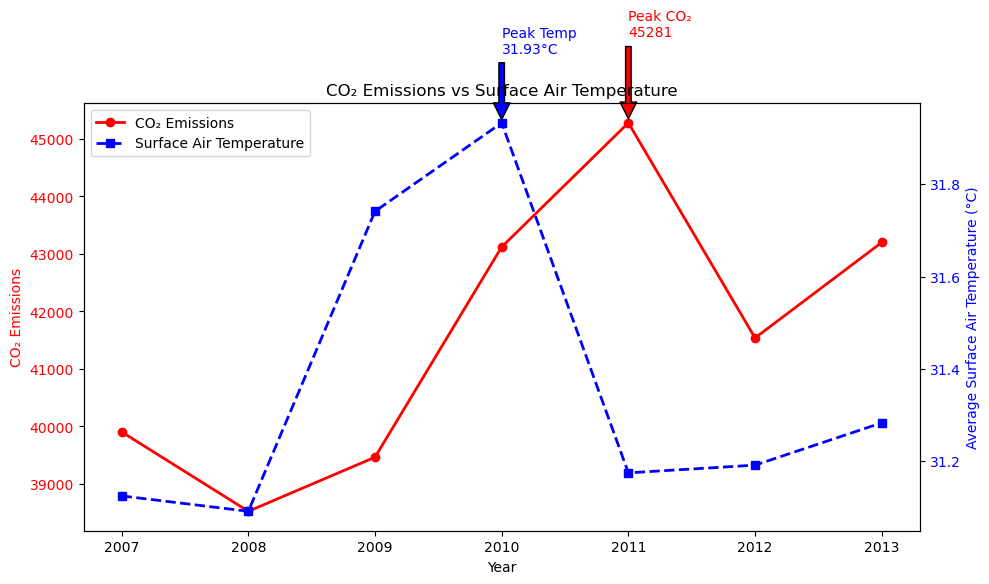

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# =====================================================
#   STEP 1: Prepare Temperature Data (groupby)
# =====================================================

temp_df = pd.read_csv(
    "datasetCA2/SurfaceAirTemperatureMonthlyMeanDailyMaximum.csv"
)

temp_df['month'] = pd.to_datetime(temp_df['month'])
temp_df['year'] = temp_df['month'].dt.year

# Group by year (slide method: groupby)
yearly_temp = temp_df.groupby('year')['temp_mean_daily_max'].mean().reset_index()


# =====================================================
#   STEP 2: Prepare CO2 Data
# =====================================================

co2_df = pd.read_csv(
    "datasetCA2/CarbonDioxideEmissionsFromCombustionOfFossilFuels.csv"
)


# =====================================================
#   STEP 3: Merge Datasets (slide method: pd.merge)
# =====================================================

merged_df = pd.merge(
    co2_df,
    yearly_temp,
    how='inner',
    on='year'
)

# Sort chronologically (slide method: sort_values)
merged_df = merged_df.sort_values(by='year')


# =====================================================
#   STEP 4: Dual Axis Plot (Styled)
# =====================================================

fig, ax1 = plt.subplots(figsize=(10, 6))

#  CO2 line (left axis)
ax1.plot(
    merged_df['year'],
    merged_df['co2_emissions'],
    color='red',               # color
    linestyle='-',             # solid line
    marker='o',                # circle markers
    linewidth=2,
    label='CO₂ Emissions'
)

ax1.set_xlabel("Year")
ax1.set_ylabel("CO₂ Emissions", color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create second axis
ax2 = ax1.twinx()

#   Temperature line (right axis)
ax2.plot(
    merged_df['year'],
    merged_df['temp_mean_daily_max'],
    color='blue',              # different color
    linestyle='--',            # dashed line
    marker='s',                # square markers
    linewidth=2,
    label='Surface Air Temperature'
)

ax2.set_ylabel("Average Surface Air Temperature (°C)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title("CO₂ Emissions vs Surface Air Temperature")

# =====================================================
#   STEP 5: Add Annotations
# =====================================================

# Highest CO2
max_co2_row = merged_df.loc[merged_df['co2_emissions'].idxmax()]
ax1.annotate(
    f"Peak CO₂\n{int(max_co2_row['co2_emissions'])}",
    xy=(max_co2_row['year'], max_co2_row['co2_emissions']),
    xytext=(max_co2_row['year'], max_co2_row['co2_emissions'] + 1500),
    arrowprops=dict(facecolor='red', shrink=0.05),
    color='red'
)

# Highest Temperature
max_temp_row = merged_df.loc[merged_df['temp_mean_daily_max'].idxmax()]
ax2.annotate(
    f"Peak Temp\n{round(max_temp_row['temp_mean_daily_max'],2)}°C",
    xy=(max_temp_row['year'], max_temp_row['temp_mean_daily_max']),
    xytext=(max_temp_row['year'], max_temp_row['temp_mean_daily_max'] + 0.15),
    arrowprops=dict(facecolor='blue', shrink=0.05),
    color='blue'
)

# =====================================================
#   Combine Legends
# =====================================================

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()



<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">

<h2 style="color:#fb923c; margin:0 0 10px;">
CO₂ Emissions vs Surface Air Temperature — Trend & Insight (2007–2013)
</h2>

<p style="color:#e5e7eb; margin:0 0 14px;">
This chart compares <strong style="color:#f87171;">CO₂ emissions</strong> with 
<strong style="color:#60a5fa;">average surface air temperature</strong> 
to examine whether increases in emissions are associated with temperature changes.
</p>

<!-- TREND WITH STATISTICS -->
<div style="background:#111827; border-left:6px solid #f87171; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#f87171; margin:0 0 10px;">
    Trend with Statistics
  </h3>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • <strong>CO₂ emissions</strong> increased from approximately 
    <strong>39,900</strong> (2007) to a peak of 
    <strong>45,281</strong> (2011), 
    an increase of about 
    <strong style="color:#f87171;">+5,382 units (~13.5%)</strong>.
  </p>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • <strong>Surface air temperature</strong> increased from 
    <strong>31.12°C</strong> (2008) to a peak of 
    <strong>31.93°C</strong> (2010), 
    representing an increase of 
    <strong style="color:#60a5fa;">+0.81°C</strong>.
  </p>

  <p style="color:#e5e7eb; margin:0;">
    • Although the peaks do not occur in the exact same year, 
    both variables show a strong upward movement during 
    <strong>2008–2011</strong>.
  </p>
</div>


<!-- RELATIONSHIP OBSERVED -->
<div style="background:#0f172a; border:1px solid #334155; border-radius:12px; padding:14px; margin:14px 0;">
  <h3 style="color:#38bdf8; margin:0 0 8px;">
    Relationship Observed
  </h3>

  <p style="color:#e5e7eb; margin:0;">
    The chart suggests a <strong style="color:#ffffff;">positive association</strong>:
    periods of rising CO₂ emissions generally correspond with 
    elevated surface air temperatures.
  </p>

  <p style="color:#e5e7eb; margin-top:10px;">
    Between <strong>2009 and 2011</strong>, CO₂ emissions rose sharply,
    and temperatures remained near peak levels. 
    This pattern is consistent with climate science, where 
    higher greenhouse gas concentrations contribute to heat retention in the atmosphere.
  </p>
</div>

<!-- INSIGHT -->
<div style="background:#111827; border-left:6px solid #22c55e; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#22c55e; margin:0 0 8px;">
    Insight & Climate Implication
  </h3>

  <p style="color:#e5e7eb; margin:0;">
    Increased <strong style="color:#f87171;">fossil fuel combustion</strong>
    leads to higher CO₂ emissions. 
    As CO₂ accumulates in the atmosphere, it strengthens the 
    <strong style="color:#fde68a;">greenhouse effect</strong>, 
    contributing to rising surface air temperatures.
  </p>

  <p style="color:#e5e7eb; margin-top:10px;">
    While this short time period does not prove direct causation,
    the upward co-movement supports the broader conclusion that
    reducing fossil fuel emissions is critical for limiting
    temperature increases.
  </p>
</div>

<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">


<h3 style="
    font-size: 36px;
    font-weight: bold;
    color: #0077cc;
    text-align: center;
    margin-top: 30px;
    margin-bottom: 20px;
">
  Yearly Distribution of Motor Vehicle Population by Type
</h3>


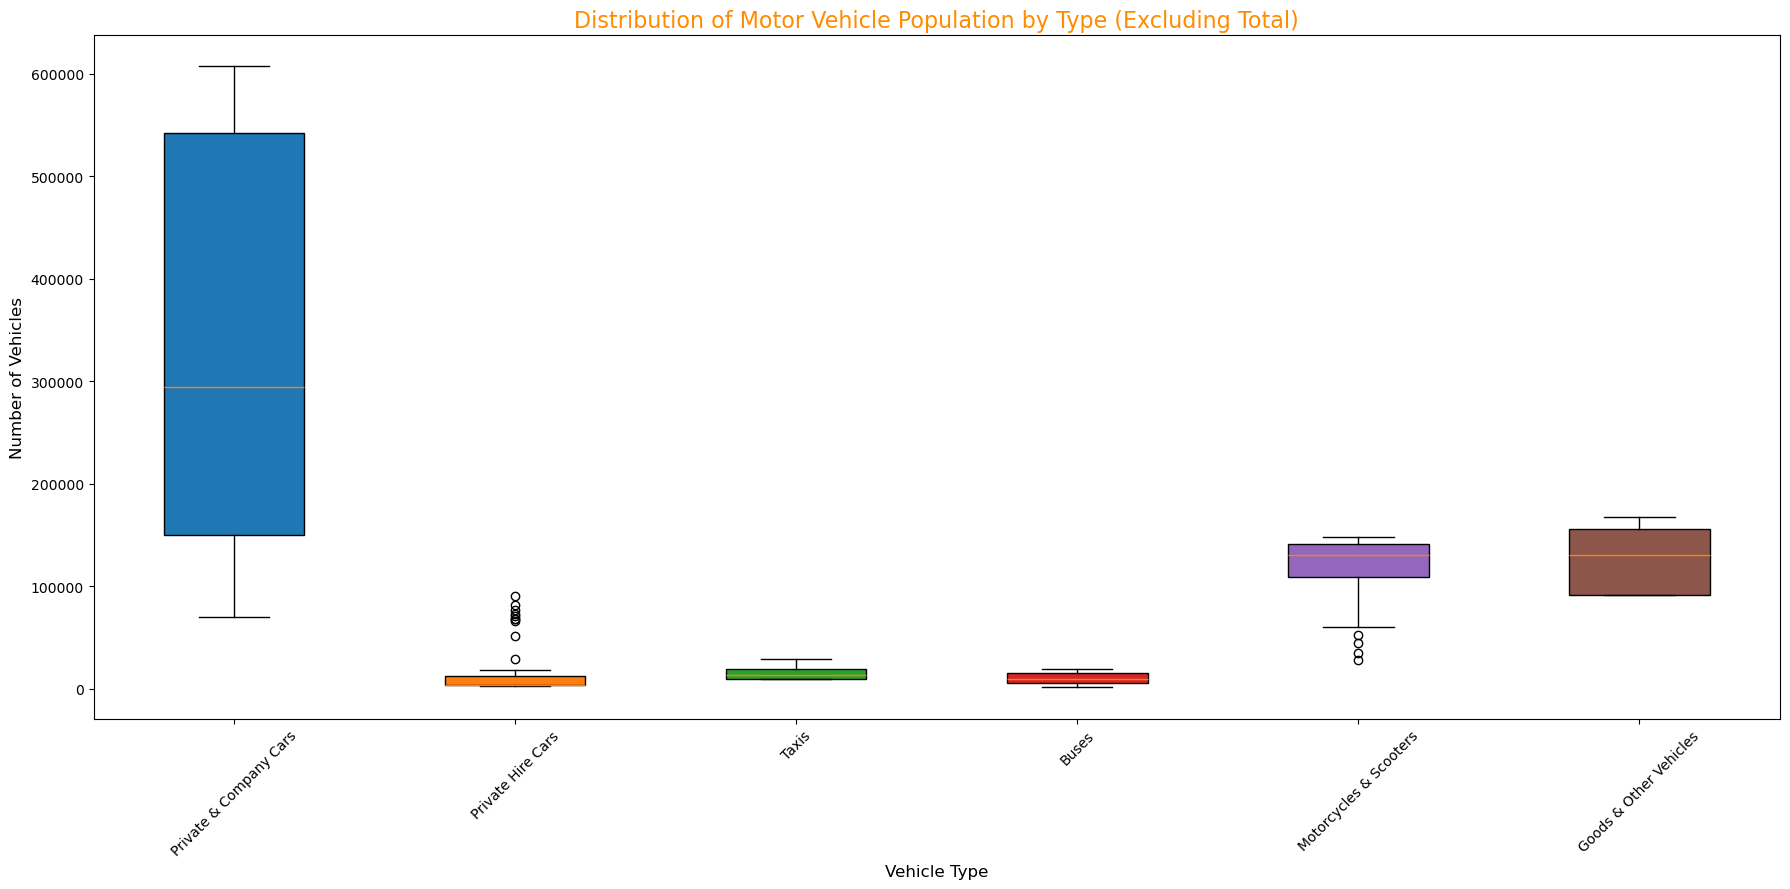

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# -----------------------------------------------------
# Clean DataSeries (remove leading spaces)
# -----------------------------------------------------
vehicle_df['DataSeries'] = vehicle_df['DataSeries'].str.strip()

# -----------------------------------------------------
#  Fill missing values (slide method)
# Forward fill across years (axis=1)
# -----------------------------------------------------
vehicle_df = vehicle_df.fillna(method='pad', axis=1)

# -----------------------------------------------------
#  Set DataSeries as index
# (ONLY do this if it is still a column)
# -----------------------------------------------------
if 'DataSeries' in vehicle_df.columns:
    vehicle_df = vehicle_df.set_index('DataSeries')

# -----------------------------------------------------
#  Convert ONLY numeric columns (years)
# -----------------------------------------------------
vehicle_df = vehicle_df.apply(pd.to_numeric, errors='coerce')

# -----------------------------------------------------
#  Remove "Total" row (improves scaling)
# -----------------------------------------------------
if "Total" in vehicle_df.index:
    vehicle_df = vehicle_df.drop("Total", axis=0)

# -----------------------------------------------------
#  Transpose (so each vehicle type becomes one box)
# -----------------------------------------------------
vehicle_transposed = vehicle_df.transpose()

# -----------------------------------------------------
#  Plot
# -----------------------------------------------------
plt.figure(figsize=(18, 9))

box = plt.boxplot(vehicle_transposed, patch_artist=True)

colors = ["#1f77b4", "#ff7f0e", "#2ca02c",
          "#d62728", "#9467bd", "#8c564b"]

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title(
    "Distribution of Motor Vehicle Population by Type (Excluding Total)",
    fontsize=16,
    color="darkorange"
)

plt.xlabel("Vehicle Type", fontsize=12)
plt.ylabel("Number of Vehicles", fontsize=12)

plt.xticks(
    range(1, len(vehicle_transposed.columns) + 1),
    vehicle_transposed.columns,
    rotation=45
)

plt.tight_layout()
plt.show()


<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">

<h2 style="color:#fb923c; margin:0 0 10px;">
Motor Vehicle Population (Boxplot) — Missing Data, Trend & Insight
</h2>

<!-- MISSING DATA SECTION -->
<div style="background:#111827; border-left:6px solid #60a5fa; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#60a5fa; margin:0 0 8px;">
    Handling Missing Values (Time-Series Justification)
  </h3>

  <p style="color:#e5e7eb; margin:0;">
    The dataset contained <strong style="color:#ffffff;">60 missing values</strong>, 
    mainly concentrated in the early years (around <strong>1961–1965</strong>). 
    From <code>df.count()</code>, those years recorded only 
    <strong>4 vehicle categories</strong> compared to the full 
    <strong>7 categories</strong> in later years.
  </p>

  <p style="color:#e5e7eb; margin-top:10px;">
    Since this is chronological annual time-series data (1961–2024), 
    forward fill using <code>fillna(method='pad')</code> is reasonable because 
    vehicle populations change gradually over time. 
    This avoids unrealistic zeros and preserves trend continuity.
  </p>
</div>

<!-- TREND SECTION -->
<div style="background:#0f172a; border:1px solid #334155; border-radius:12px; padding:14px; margin:14px 0;">
  <h3 style="color:#38bdf8; margin:0 0 8px;">
    Trend Observed (Distribution Across Years)
  </h3>

  <p style="color:#e5e7eb; margin:0;">
    The boxplot reveals that 
    <strong style="color:#f59e0b;">Private & Company Cars</strong> 
    dominate Singapore’s vehicle population.
  </p>

  <ul style="color:#e5e7eb; margin:10px 0 0; line-height:1.6;">
    <li>
      Car population increased from approximately 
      <strong>~70,000</strong> in early years 
      to over <strong>600,000+</strong> in recent years.
    </li>
    <li>
      The median car population is around 
      <strong style="color:#f59e0b;">~300,000</strong>.
    </li>
    <li>
      <strong>Taxis</strong> and <strong>Buses</strong> remain below 
      <strong>30,000</strong>.
    </li>
    <li>
      <strong>Motorcycles & Scooters</strong> and 
      <strong>Goods & Other Vehicles</strong> typically range between 
      <strong>~80,000–170,000</strong>.
    </li>
  </ul>
</div>

<!-- INSIGHT SECTION -->
<div style="background:#111827; border-left:6px solid #22c55e; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#22c55e; margin:0 0 8px;">
    Insight: Fossil Fuel Dependence & CO₂ Implications
  </h3>

  <p style="color:#e5e7eb; margin:0;">
    Since the majority of private cars operate using 
    <strong style="color:#f59e0b;">petrol or diesel</strong>, 
    the large and sustained increase in private vehicle population 
    suggests a significant rise in 
    <strong style="color:#f87171;">fossil fuel combustion</strong>.
  </p>

  <p style="color:#e5e7eb; margin-top:10px;">
    Increased fossil fuel burning leads to higher 
    <strong style="color:#ffffff;">CO₂ emissions</strong>, 
    which contributes to greenhouse gas accumulation. 
    This supports the broader finding that growth in private vehicle usage 
    is linked to rising emissions and potential increases in 
    <strong style="color:#fde68a;">surface air temperature</strong>.
  </p>
</div>

<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">


<h3 style="
    font-size: 36px;
    font-weight: bold;
    color: #0077cc;
    text-align: center;
    margin-top: 30px;
    margin-bottom: 20px;
">
    Do Increases in Fossil Fuel Vehicles Correspond to Higher Fossil-Based Electricity Generation?
</h3>


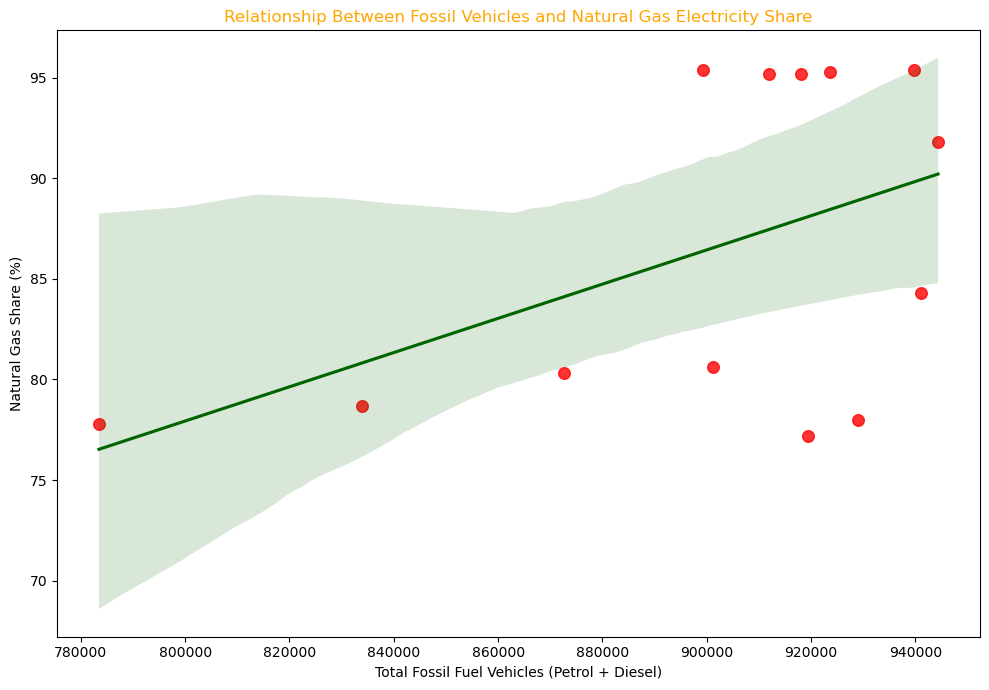

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================================
# BOOLEAN INDEXING (Select Fossil Engines)
# Slide: Selections → Boolean Mask
# ==========================================================

fossil_engines = ['Petrol', 'Diesel']

vehicle_fossil = vehicle_fuel_df[
    vehicle_fuel_df['engine'].isin(fossil_engines)
]

# ==========================================================
#  GROUPBY (Aggregate by Year)
# Slide: Group Data → groupby()
# ==========================================================

vehicle_total = (
    vehicle_fossil
    .groupby('year')['number']
    .sum()
)

# ==========================================================
#  PIVOT (Reshaping Electricity Data)
# Slide: Reshaping Data → pivot()
# ==========================================================

fuel_pivot = fuel_df.pivot(
    index='year',
    columns='energy_products',
    values='percentage'
)

# Select only fossil electricity sources
fuel_fossil = fuel_pivot.loc[
    :, fuel_pivot.columns.isin(['Natural Gas', 'Petroleum Products'])
]


# ==========================================================
#  REINDEX (Align Both Datasets by Common Years)
# Slide: Reindexing
# ==========================================================

common_years = vehicle_total.index.intersection(fuel_fossil.index)

vehicle_total = vehicle_total.reindex(common_years)
fuel_fossil = fuel_fossil.reindex(common_years)

# =========================================================
#  MERGE INTO ONE DATAFRAME (For Scatter)
# ==========================================================

merged_df = vehicle_total.to_frame(name='Total_Fossil_Vehicles')
merged_df['Natural_Gas_%'] = fuel_fossil['Natural Gas']

# ==========================================================
#  SCATTER PLOT WITH REGRESSION LINE
# Graph Type: Scatter Plot (Recommended for Relationship)
# ==========================================================

plt.figure(figsize=(10,7))

sns.regplot(
    data=merged_df,
    x='Total_Fossil_Vehicles',
    y='Natural_Gas_%',
    scatter_kws={'s':70, 'color':'red'},   # scatter dots
    line_kws={'color':'darkgreen'},          # regression line
    color='lightgreen',                      # controls CI shading
    ci=95
)

plt.title("Relationship Between Fossil Vehicles and Natural Gas Electricity Share", color='orange')
plt.xlabel("Total Fossil Fuel Vehicles (Petrol + Diesel)")
plt.ylabel("Natural Gas Share (%)")

plt.tight_layout()
plt.show()



<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">

<h2 style="color:#fb923c; margin:0 0 10px;">
Relationship Between Fossil-Fuel Vehicles and Fossil-Fuel Electricity Mix
</h2>

<p style="color:#e5e7eb; margin:0 0 14px;">
This analysis compares Singapore’s 
<strong style="color:#f59e0b;">fossil-fuel vehicle population (Petrol + Diesel)</strong> 
with the 
<strong style="color:#60a5fa;">natural gas share in electricity generation</strong> 
across overlapping years. The goal is to understand trends related to 
<strong style="color:#f87171;">fossil fuel burning</strong> and its potential impact on 
<strong style="color:#ffffff;">CO₂ emissions</strong>.
</p>

<!-- KEY STATS -->
<div style="background:#111827; border-left:6px solid #60a5fa; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#60a5fa; margin:0 0 8px;">
    Key Statistics (Overlapping Years)
  </h3>
  <ul style="color:#e5e7eb; margin:0; line-height:1.6;">
    <li>
      <strong style="color:#60a5fa;">Natural Gas share</strong> increased by 
      <strong style="color:#60a5fa;">+27.69%</strong> overall.
    </li>
    <li>
      <strong style="color:#f59e0b;">Fossil-fuel vehicles</strong> increased from approximately 
      <strong>~780,000</strong> to <strong>~940,000+</strong> 
      (around <strong style="color:#f59e0b;">~20.5%</strong> growth).
    </li>
    <li>
      Natural gas electricity share rose from roughly 
      <strong>~76–78%</strong> to <strong>~95%</strong> across the plotted years.
    </li>
  </ul>
</div>

<!-- TREND OBSERVED -->
<div style="background:#0f172a; border:1px solid #334155; border-radius:12px; padding:14px; margin:14px 0;">
  <h3 style="color:#38bdf8; margin:0 0 8px;">
    Trend Observed
  </h3>
  <p style="color:#e5e7eb; margin:0;">
    The scatter plot shows a <strong style="color:#ffffff;">positive relationship</strong>:
    when the total number of fossil-fuel vehicles is higher, the natural gas share in
    electricity generation also tends to be higher. The upward regression line
    indicates this overall positive trend.
  </p>
</div>

<!-- WHY IT MATTERS -->
<div style="background:#0f172a; border:1px solid #334155; border-radius:12px; padding:14px; margin:14px 0;">
  <h3 style="color:#34d399; margin:0 0 8px;">
    Why This Matters (CO₂ and Fossil Fuel Burning)
  </h3>
  <ul style="color:#e5e7eb; margin:0; line-height:1.6;">
    <li>
      <strong style="color:#f59e0b;">Transport emissions:</strong>
      Petrol and diesel vehicles burn fossil fuels directly, producing CO₂.
      Growth in fossil vehicles suggests potentially higher transport emissions.
    </li>
    <li>
      <strong style="color:#60a5fa;">Electricity emissions mix:</strong>
      Natural gas is still a fossil fuel, but it produces lower CO₂ per unit of electricity
      compared to heavier petroleum products. The data shows a clear shift toward natural gas,
      indicating reduced carbon intensity in electricity generation.
    </li>
  </ul>
</div>

<!-- INSIGHTS -->
<div style="background:#111827; border-left:6px solid #22c55e; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#22c55e; margin:0 0 8px;">
    Insights and Impact
  </h3>
  <ul style="color:#e5e7eb; margin:0; line-height:1.6;">
    <li>
      <strong>Parallel growth effect:</strong>
      Economic and energy demand growth likely drives both higher vehicle population
      and increased electricity generation.
    </li>
    <li>
      <strong>Cleaner fossil transition (electricity side):</strong>
      The <strong style="color:#60a5fa;">+27.69%</strong> increase in natural gas share
      indicates movement toward a comparatively lower-carbon fossil fuel.
    </li>
    <li>
      <strong>Transport sustainability concern:</strong>
      The <strong style="color:#f59e0b;">~20.5%</strong> increase in fossil-fuel vehicles
      suggests continued reliance on petrol and diesel, potentially sustaining high CO₂ emissions.
    </li>
    <li>
      <strong>Correlation, not causation:</strong>
      The relationship reflects trends across shared years and does not prove
      that fossil vehicles directly cause higher natural gas usage.
    </li>
  </ul>
</div>

<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">


<h3 style="
    font-size: 36px;
    font-weight: bold;
    color: #0077cc;
    text-align: center;
    margin-top: 30px;
    margin-bottom: 20px;
">
   Do Cars, Taxis and Buses Rely Primarily on Fossil Fuels?
</h3>


<Figure size 1400x800 with 0 Axes>

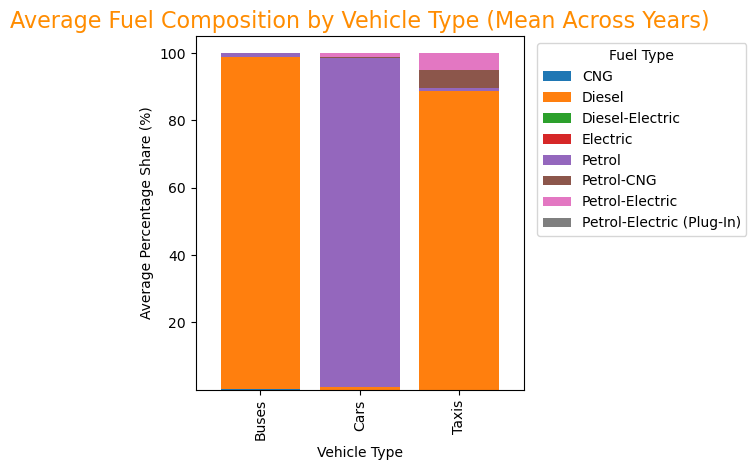

In [ ]:
import matplotlib.pyplot as plt

# =====================================================
# Create Vehicle Groups
# =====================================================
vehicle_fuel_df['type'] = vehicle_fuel_df['type'].str.strip()

vehicle_fuel_df['Vehicle_Group'] = vehicle_fuel_df['type']

vehicle_fuel_df.loc[
    vehicle_fuel_df['type'].isin(['Cars','Private Hire Cars']),
    'Vehicle_Group'
] = 'Cars'

vehicle_fuel_df.loc[
    vehicle_fuel_df['type'] == 'Taxis',
    'Vehicle_Group'
] = 'Taxis'

vehicle_fuel_df.loc[
    vehicle_fuel_df['type'] == 'Buses',
    'Vehicle_Group'
] = 'Buses'

# =====================================================
#  Keep only Cars, Taxis, Buses
# =====================================================
filtered_df = vehicle_fuel_df[
    vehicle_fuel_df['Vehicle_Group'].isin(['Cars','Taxis','Buses'])
]

# =====================================================
#  Group by Vehicle_Group + Engine (mean across years)
# =====================================================
mean_df = filtered_df.groupby(
    ['Vehicle_Group','engine']
)['number'].mean().reset_index()

# =====================================================
#  Pivot table (Vehicle_Group × Engine)
# =====================================================
pivot_df = mean_df.pivot(
    index='Vehicle_Group',
    columns='engine',
    values='number'
)

# =====================================================
#  Convert to percentage share
# =====================================================
percentage_df = pivot_df.div(
    pivot_df.sum(axis=1),
    axis=0
) * 100

# =====================================================
#  Plot 100% Stacked Bar Chart
# =====================================================
plt.figure(figsize=(14,8))

percentage_df.plot(
    kind='bar',
    stacked=True,
    width=0.8
)

plt.title(
    "Average Fuel Composition by Vehicle Type (Mean Across Years)",
    fontsize=16,
    color="darkorange"
)

plt.xlabel("Vehicle Type")
plt.ylabel("Average Percentage Share (%)")

plt.legend(
    title="Fuel Type",
    bbox_to_anchor=(1.02,1),
    loc="upper left"
)

plt.tight_layout()
plt.show()


<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">

<h2 style="color:#fb923c; margin:0 0 10px;">
Trend with Statistics (Mean Across Years)
</h2>

<p style="color:#e5e7eb; margin:0 0 14px;">
The chart shows the <strong style="color:#ffffff;">average fuel composition</strong> for each vehicle type across all years, revealing which fuels dominate long-term usage.
</p>

<!-- CARS -->
<div style="background:#111827; border-left:6px solid #60a5fa; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#60a5fa; margin:0 0 8px;">Cars</h3>
  <ul style="color:#e5e7eb; margin:0; line-height:1.6;">
    <li><strong style="color:#f59e0b;">Petrol</strong> accounts for <strong style="color:#f59e0b;">~98–99%</strong> of total car fuel usage.</li>
    <li>Diesel, electric, and hybrid categories together make up <strong style="color:#a7f3d0;">less than ~2%</strong> on average.</li>
    <li>This indicates <strong style="color:#f87171;">very high fossil-fuel dependence</strong>.</li>
  </ul>
</div>

<!-- TAXIS -->
<div style="background:#111827; border-left:6px solid #a78bfa; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#a78bfa; margin:0 0 8px;">Taxis</h3>
  <ul style="color:#e5e7eb; margin:0; line-height:1.6;">
    <li><strong style="color:#f97316;">Diesel</strong> dominates at <strong style="color:#f97316;">~88–90%</strong> on average.</li>
    <li>Petrol-CNG and petrol-electric hybrids contribute roughly <strong style="color:#22c55e;">~5–8%</strong> combined.</li>
    <li>Pure electric share remains very small.</li>
    <li>Taxis remain <strong style="color:#f87171;">heavily fossil-based</strong>.</li>
  </ul>
</div>

<!-- BUSES -->
<div style="background:#111827; border-left:6px solid #fb7185; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#fb7185; margin:0 0 8px;">Buses</h3>
  <ul style="color:#e5e7eb; margin:0; line-height:1.6;">
    <li><strong style="color:#f97316;">Diesel</strong> accounts for <strong style="color:#f97316;">~98–99%</strong> of bus fuel usage.</li>
    <li>Alternative fuels are nearly negligible.</li>
    <li>Buses remain one of the most <strong style="color:#f87171;">fossil-dependent</strong> transport types.</li>
  </ul>
</div>

<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">

<!-- INSIGHT 1 -->
<div style="background:#0f172a; border:1px solid #334155; border-radius:12px; padding:14px; margin:14px 0;">
  <h3 style="color:#38bdf8; margin:0 0 8px;">
    Key Insight 1: Fossil Fuels Dominate Transport
  </h3>
  <ul style="color:#e5e7eb; margin:0; line-height:1.6;">
    <li>Across all categories, <strong style="color:#ffffff;">~85–99%</strong> of fuel usage comes from <strong style="color:#f59e0b;">fossil fuels</strong>.</li>
    <li>Alternative fuels (Electric, Hybrid, CNG) form only a small proportion.</li>
    <li>This confirms Singapore’s major transport categories are <strong style="color:#f87171;">structurally fossil-dependent</strong>.</li>
  </ul>
</div>

<!-- INSIGHT 2 -->
<div style="background:#0f172a; border:1px solid #334155; border-radius:12px; padding:14px; margin:14px 0;">
  <h3 style="color:#34d399; margin:0 0 8px;">
    Key Insight 2: Implications for CO₂ Emissions and Surface Temperature
  </h3>
  <p style="color:#e5e7eb; margin:0 0 10px;">
    Since <strong style="color:#f59e0b;">petrol and diesel</strong> are carbon-intensive fuels and dominate usage, transport contributes to:
  </p>
  <ul style="color:#e5e7eb; margin:0; line-height:1.6;">
    <li><strong style="color:#f87171;">Higher CO₂ emissions</strong></li>
    <li>Increased greenhouse gas accumulation</li>
    <li>Rising surface air temperatures and urban heat effects</li>
  </ul>
  <p style="color:#e5e7eb; margin:10px 0 0;">
    Even with increasing green vehicle adoption, the overall transport system remains fossil-dominated.
  </p>
</div>

<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">

<!-- RECOMMENDATION -->
<div style="background:#111827; border-left:6px solid #22c55e; padding:14px; border-radius:12px; margin:14px 0;">
  <h2 style="color:#22c55e; margin:0 0 8px;">
    Recommendation: Prioritise Electrification of Diesel-Heavy Fleets
  </h2>

  <p style="color:#e5e7eb; margin:0 0 10px;">
    Because buses (~98–99% diesel) and taxis (~88–90% diesel) remain heavily fossil-based, they represent the highest-impact targets for emissions reduction.
  </p>

  <ul style="color:#e5e7eb; margin:0; line-height:1.6;">
    <li>Electrify public bus fleets to reduce large-scale diesel emissions.</li>
    <li>Accelerate taxi fleet transition to hybrid and electric vehicles.</li>
    <li>Ensure electricity generation continues shifting toward lower-carbon sources.</li>
  </ul>

  <div style="margin-top:12px; padding:10px; background:#0b1220; border:1px solid #334155; border-radius:12px;">
    <p style="margin:0; color:#ffffff; font-weight:700;">
      Key takeaway: Fossil fuels dominate (85–99%), so the fastest emissions reduction comes from electrifying diesel-heavy fleets while improving electricity cleanliness.
    </p>
  </div>
</div>


<h3 style="
    font-size: 36px;
    font-weight: bold;
    color: #0077cc;
    text-align: center;
    margin-top: 30px;
    margin-bottom: 20px;
">
   Are green vehicles increasing while electricity is becoming cleaner?
</h3>


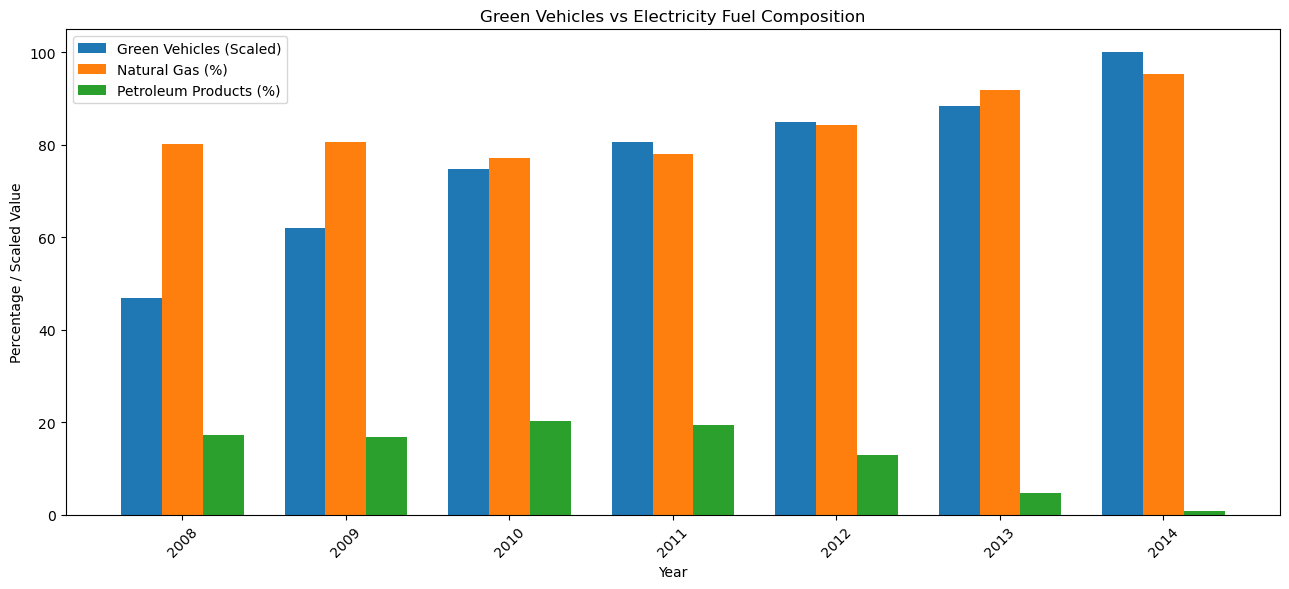

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reset index
fuel_df2 = pivot_df.reset_index()

#  Merge datasets
merged_df = pd.merge(
    green_df,
    fuel_df2,
    how='inner',
    on='year'
)

#  Subset relevant columns
subset_df = merged_df.loc[:, [
    'year',
    'no_of_green_vehicles',
    'Natural Gas',
    'Petroleum Products'
]].copy()

#  Boolean indexing (years >= 2008)
subset_df = subset_df[subset_df['year'] >= 2008]

#  Set index to year
subset_df = subset_df.set_index('year')

#  Scale green vehicles
subset_df['Green_Scaled'] = (
    subset_df['no_of_green_vehicles'] /
    subset_df['no_of_green_vehicles'].max()
) * 100

#   Grouped Bar Chart
x = np.arange(len(subset_df))
width = 0.25

plt.figure(figsize=(13,6))

plt.bar(x - width,
        subset_df['Green_Scaled'],
        width,
        label='Green Vehicles (Scaled)')

plt.bar(x,
        subset_df['Natural Gas'],
        width,
        label='Natural Gas (%)')

plt.bar(x + width,
        subset_df['Petroleum Products'],
        width,
        label='Petroleum Products (%)')

plt.xticks(x, subset_df.index, rotation=45)
plt.xlabel("Year")
plt.ylabel("Percentage / Scaled Value")
plt.title("Green Vehicles vs Electricity Fuel Composition")

plt.legend()
plt.tight_layout()
plt.show()


<h2 style="color:#ffffff; font-weight:600;">
Are Green Vehicles Increasing While Electricity is Becoming Cleaner?
</h2>

<p style="color:#e5e7eb;">
From 2008 to 2014, 
<span style="color:#2ecc71; font-weight:600;">green vehicle adoption</span> 
increased steadily, rising from 
<strong style="color:#2ecc71;">47% (scaled)</strong> in 2008 to 
<strong style="color:#2ecc71;">100% (scaled)</strong> in 2014, 
indicating strong and consistent electrification growth.
</p>

<p style="color:#e5e7eb;">
During the same period, 
<strong style="color:#e74c3c;">Petroleum Products</strong> 
declined sharply from approximately 
<strong style="color:#e74c3c;">17%</strong> to 
<strong style="color:#e74c3c;">1%</strong>. 
Meanwhile, 
<strong style="color:#f39c12;">Natural Gas</strong> 
remained dominant, increasing from about 
<strong style="color:#f39c12;">80%</strong> to 
<strong style="color:#f39c12;">95%</strong>.
</p>

<div style="
    background-color:#1f2937;
    border-left:5px solid #60a5fa;
    padding:12px;
    margin-top:12px;
    color:#f9fafb;
">
<strong style="color:#60a5fa;">Key Observation:</strong> 
Electricity became cleaner in terms of reduced petroleum use, but the grid remained largely fossil-fuel dependent due to continued reliance on Natural Gas.
</div>

<hr style="border-color:#374151; margin:25px 0;">

<h3 style="color:#ffffff;">Why Choose Natural Gas and Petroleum Products?</h3>

<ul style="color:#e5e7eb;">
<li>
<strong style="color:#f39c12;">Natural Gas</strong> is the primary electricity source in the dataset. Since green vehicles rely on electricity, their environmental impact depends heavily on how electricity is generated.
</li>
<li>
<strong style="color:#e74c3c;">Petroleum Products</strong> are generally more carbon-intensive. A significant reduction in petroleum-based generation indicates movement away from higher-emission fuels.
</li>
</ul>

<p style="color:#93c5fd; font-style:italic;">
“Are EVs being powered by a cleaner electricity system over time?”
</p>

<hr style="border-color:#374151; margin:25px 0;">

<h3 style="color:#ffffff;">Trend with Statistics</h3>

<ul style="color:#e5e7eb;">
<li><span style="color:#2ecc71;">Green vehicles</span> increased consistently between 2008–2014.</li>
<li><span style="color:#e74c3c;">Petroleum-based electricity</span> fell from ~17% to ~1%.</li>
<li><span style="color:#f39c12;">Natural Gas</span> remained dominant, increasing from ~80% to ~95%.</li>
</ul>

<p style="color:#e5e7eb;">
Overall, from 2008–2014, petroleum-based electricity generation declined significantly while green vehicle adoption rose steadily. This suggests electrification occurred alongside a shift away from petroleum-based generation.
</p>

<hr style="border-color:#374151; margin:25px 0;">

<h3 style="color:#ffffff;">Insights and Impacts</h3>

<h4 style="color:#2ecc71;">Insight 1: Electrification is Occurring</h4>
<p style="color:#e5e7eb;">
The steady increase in green vehicles demonstrates progress toward transport electrification and lower-emission vehicle adoption.
</p>

<h4 style="color:#e74c3c;">Insight 2: Cleaner Grid via Reduced Petroleum</h4>
<p style="color:#e5e7eb;">
The sharp decline in petroleum products suggests the grid is transitioning away from more carbon-intensive fuels.
</p>

<h4 style="color:#f39c12;">Insight 3: The Grid Remains Fossil-Dominant</h4>
<p style="color:#e5e7eb;">
Despite reductions in petroleum use, Natural Gas continues to dominate electricity generation. EVs remain indirectly linked to fossil fuel emissions.
</p>

<hr style="border-color:#374151; margin:25px 0;">

<h3 style="color:#ffffff;">Conclusion</h3>

<p style="color:#e5e7eb;">
Green vehicles are clearly increasing, and electricity generation has become cleaner in one important aspect — reduced petroleum-based generation. However, because electricity still relies heavily on Natural Gas, the overall system remains fossil-dependent.
</p>




<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">

<h2 style="color:#ffffff; margin:0 0 10px;">Recommendations (Supported by Statistics)</h2>

<p style="color:#e5e7eb; margin:0 0 14px;">
Your data shows that <strong style="color:#2ecc71;">green vehicles increased rapidly</strong> while the electricity mix
became <strong style="color:#60a5fa;">cleaner mainly by reducing petroleum-based generation</strong> — but the grid is still
<strong style="color:#f39c12;">fossil-dominant</strong> due to Natural Gas.
</p>

<!-- STAT SNAPSHOT -->
<div style="background:#0f172a; border:1px solid #334155; border-radius:12px; padding:14px; margin:14px 0;">
  <h3 style="color:#93c5fd; margin:0 0 8px;">Key Statistics (2008 → 2014)</h3>
  <ul style="color:#e5e7eb; margin:0; line-height:1.6;">
    <li>
      <strong style="color:#2ecc71;">Green vehicles</strong> increased from
      <strong style="color:#2ecc71;">5,443</strong> to <strong style="color:#2ecc71;">11,635</strong>
      (<strong style="color:#2ecc71;">+113.76%</strong>).
      <span style="color:#94a3b8;">(Scaled: 46.78 → 100.00)</span>
    </li>
    <li>
      <strong style="color:#f39c12;">Natural Gas</strong> share rose from
      <strong style="color:#f39c12;">80.3%</strong> to <strong style="color:#f39c12;">95.4%</strong>
      (<strong style="color:#f39c12;">+15.1 percentage points</strong>).
    </li>
    <li>
      <strong style="color:#e74c3c;">Petroleum Products</strong> share fell from
      <strong style="color:#e74c3c;">17.2%</strong> to <strong style="color:#e74c3c;">0.7%</strong>
      (<strong style="color:#e74c3c;">−16.5 percentage points</strong>, about
      <strong style="color:#e74c3c;">−95.93%</strong> relative decrease).
    </li>
  </ul>
</div>

<!-- RECOMMENDATION 1 -->
<div style="background:#111827; border-left:6px solid #2ecc71; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#2ecc71; margin:0 0 8px;">
    1) Transport-Side: Expand Green Vehicle Adoption (Powered by Cleaner Natural Gas)
  </h3>

  <p style="color:#e5e7eb; margin:0;">
    Green vehicles more than 
    <strong style="color:#2ecc71;">doubled (+113.76%)</strong> between 2008 and 2014, 
    increasing from <strong>5,443</strong> to <strong>11,635</strong> vehicles. 
    During the same period, electricity generation shifted away from 
    <strong style="color:#e74c3c;">Petroleum Products (17.2% → 0.7%)</strong> 
    and relied primarily on 
    <strong style="color:#f39c12;">Natural Gas (80.3% → 95.4%)</strong>.
  </p>

  <p style="color:#e5e7eb; margin-top:10px;">
    Since green vehicles operate using electricity, and electricity is predominantly 
    generated from Natural Gas — which is cleaner and less carbon-intensive than 
    petroleum — expanding green vehicle adoption helps reduce overall transport emissions.
  </p>

  <ul style="color:#e5e7eb; margin:10px 0 0; line-height:1.6;">
    <li>Expand EV charging infrastructure across residential and commercial areas</li>
    <li>Provide incentives to accelerate the replacement of petrol vehicles</li>
    <li>Encourage fleet electrification for taxis and delivery services</li>
  </ul>
</div>

<!-- RECOMMENDATION 2 -->
<div style="background:#111827; border-left:6px solid #f39c12; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#f39c12; margin:0 0 8px;">
    2) Maintain and Improve Cleaner Electricity Generation
  </h3>

  <p style="color:#e5e7eb; margin:0;">
    The data shows that Natural Gas dominates electricity generation and has largely 
    replaced petroleum-based generation. Because Natural Gas produces lower carbon 
    emissions compared to petroleum products, this strengthens the environmental 
    advantage of green vehicles.
  </p>

  <p style="color:#e5e7eb; margin-top:10px;">
    Continued improvement in electricity efficiency and gradual reduction in fossil 
    dependence will further enhance the emissions benefits of electrification.
  </p>
</div>

<!-- KEY TAKEAWAY -->
<div style="background:#0b1220; border:1px solid #334155; border-radius:12px; padding:12px; margin-top:14px;">
  <p style="color:#ffffff; font-weight:600; margin:0;">
    Key takeaway:
    <span style="color:#2ecc71;">Green vehicles reduce direct petrol combustion</span>
    and are powered mainly by 
    <span style="color:#f39c12;">Natural Gas-based electricity</span>, 
    which is significantly cleaner than petroleum products. 
    Therefore, promoting green vehicles contributes to lower overall carbon emissions.
  </p>
</div>

